Repaso

# Redes neuronales para la resolución de problemas de regresión y clasificación

Vamos a emplear la base de datos de precios de casas de Boston (https://www.kaggle.com/c/boston-housing) en el que, dado una base de datos de 506 casas con 13 características asociadas a cada una de ellas, se pretende predecir el precio de la misma.

Para comprender la diferencia entre la resolución de problemas de regresión y clasificación vamos a abordar el problema de dos formas diferntes:
- Regresión: Predicción del precio de la casa
- Clasificación: Predicción si el precio de la casa va a ser ALTO, MEDIO o BAJO.

Descripción

Este conjunto de datos contiene información recopilada por el Servicio de Censos de los EE.UU. sobre las viviendas en el área de Boston Mass. Se obtuvo del archivo StatLib (http://lib.stat.cmu.edu/datasets/boston), y se ha utilizado extensamente en toda la literatura para comparar diferentes algoritmos de Machine Learning.

Los datos fueron publicados originalmente por Harrison, D. y Rubinfeld, D.L. Precios hedónicos y la demanda de aire limpio', J. Environ. Economics & Management, vol.5, 81-102, 1978.

Características del conjunto de datos

El conjunto de datos es pequeño, con sólo 506 casos. Contiene 14 características que se describen a continuación:

    CRIM: per capita crime rate by town
    ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS: proportion of non-retail business acres per town.
    CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX: nitric oxides concentration (parts per 10 million)
    RM: average number of rooms per dwelling
    AGE: proportion of owner-occupied units built prior to 1940
    DIS: weighted distances to five Boston employment centres
    RAD: index of accessibility to radial highways
    TAX: full-value property-tax rate per 10,000 dollars
    PTRATIO: pupil-teacher ratio by town
    B: 1000(Bk — 0.63)² where Bk is the proportion of blacks by town
    LSTAT: % lower status of the population
    MEDV: Median value of owner-occupied homes in 1000 dollars

    ***********************************************************



1. **CRIM:** Tasa de criminalidad per cápita por ciudad.
2. **ZN:** Proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados.
3. **INDUS:** Proporción de acres de negocios no minoristas por ciudad.
4. **CHAS:** Variable ficticia del río Charles (1 si el área limita con el río; 0 en caso contrario).
5. **NOX:** Concentración de óxidos de nitrógeno (partes por 10 millones).
6. **RM:** Número promedio de habitaciones por vivienda.
7. **AGE:** Proporción de unidades ocupadas por sus propietarios construidas antes de 1940.
8. **DIS:** Distancias ponderadas a cinco centros de empleo de Boston.
9. **RAD:** Índice de accesibilidad a carreteras radiales.
10. **TAX:** Tasa de impuesto a la propiedad de valor completo por $10,000.
11. **PTRATIO:** Proporción alumno-maestro por ciudad.
12. **B:** \(1000(Bk - 0.63)^2\), donde Bk es la proporción de residentes afroamericanos por ciudad.

13. **LSTAT:** Porcentaje de población de estatus socioeconómico bajo.

14. **MEDV:** Valor mediano de las viviendas ocupadas por sus propietarios en $1000.




Para el entrenamiento, ajuste y testeo del modelo diseñado vamos a emplear los siguientes conjuntos de datos:

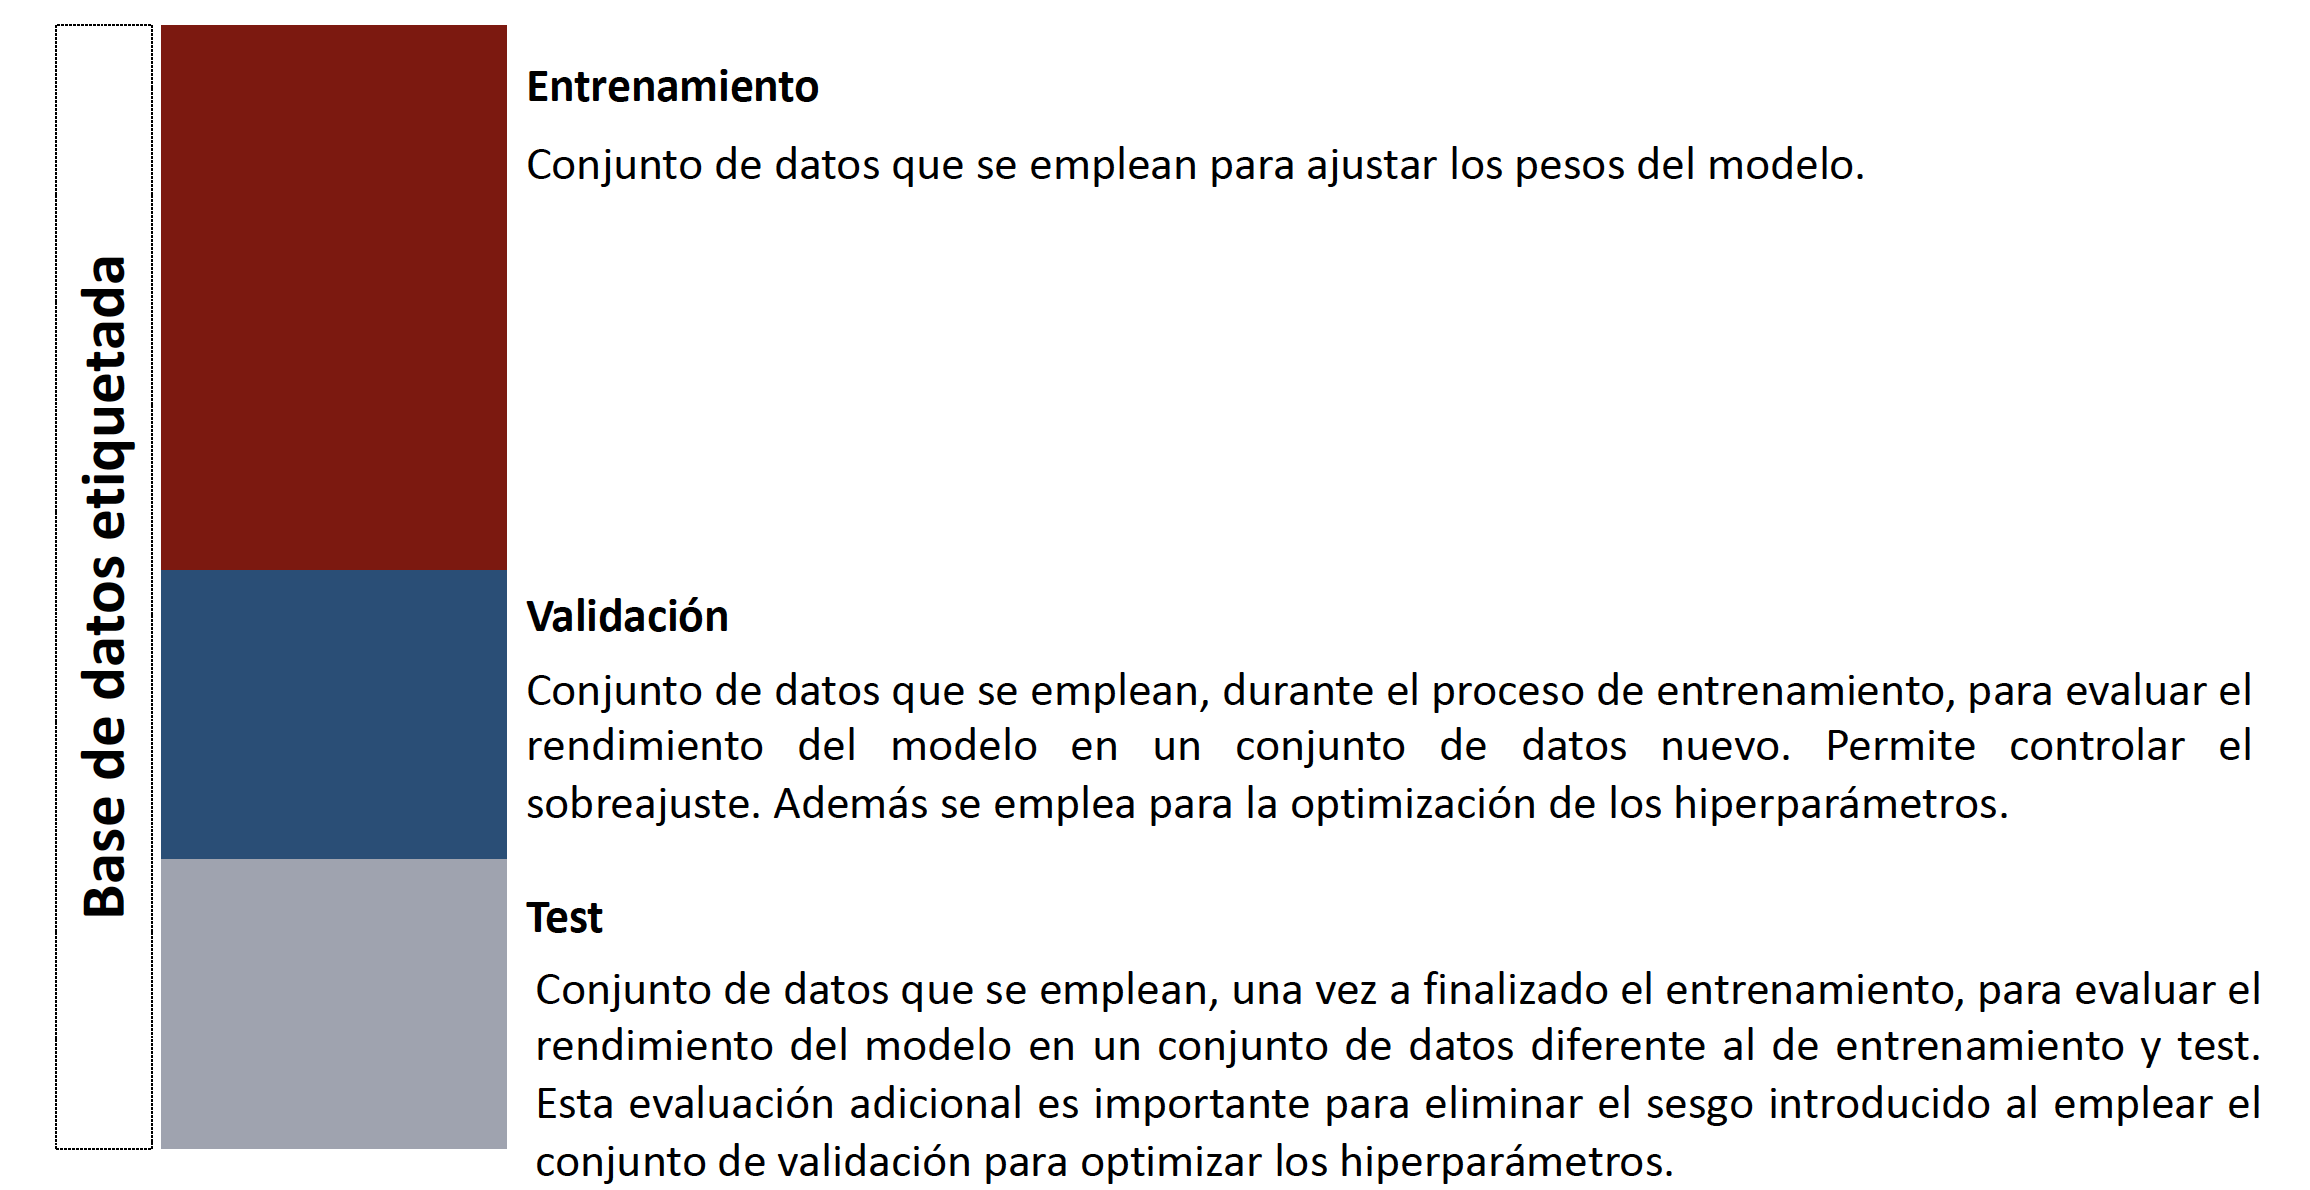

**Paso 1: Cargado y preparación de los datos**

In [1]:
# Dependencias que vamos a emplear durante la sesión
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


Vamos a descarcar la base de datos de la [API de Keras](https://keras.io/api/datasets/). En esta podemos encontrar unos pocos datasets para entrenar nuestros modelos.
Podemos encontrar más datasets en la [API de tensorflow](https://github.com/tensorflow/datasets).

In [2]:
(X_train_val, y_train_val), (X_test, y_test) = keras.datasets.boston_housing.load_data()

In [3]:
print('Entrada entrenamiento/validación: ', X_train_val.shape)
print('Salida entrenamiento/validación: ', y_train_val.shape)
print('Entrada test: ', X_test.shape)
print('Salida test: ', y_test.shape)

Entrada entrenamiento/validación:  (404, 13)
Salida entrenamiento/validación:  (404,)
Entrada test:  (102, 13)
Salida test:  (102,)


In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2)

In [5]:
print('Entrada entrenamiento: ', X_train.shape)
print('Salida entrenamiento: ', y_train.shape)
print('Entrada validación: ', X_val.shape)
print('Salida validación: ', y_val.shape)

Entrada entrenamiento:  (323, 13)
Salida entrenamiento:  (323,)
Entrada validación:  (81, 13)
Salida validación:  (81,)


Text(0.5, 1.0, 'Entrenamiento. Min: 5.6, Max: 50.0, Media: 23.07843137254902')

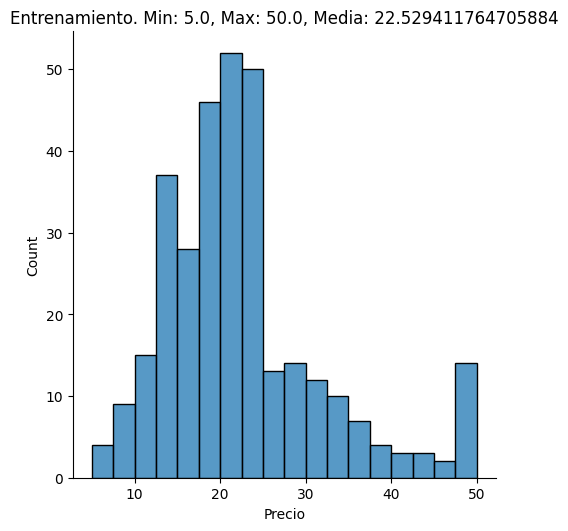

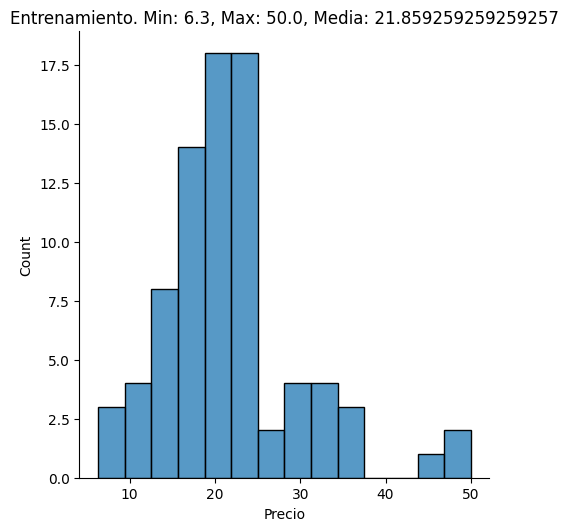

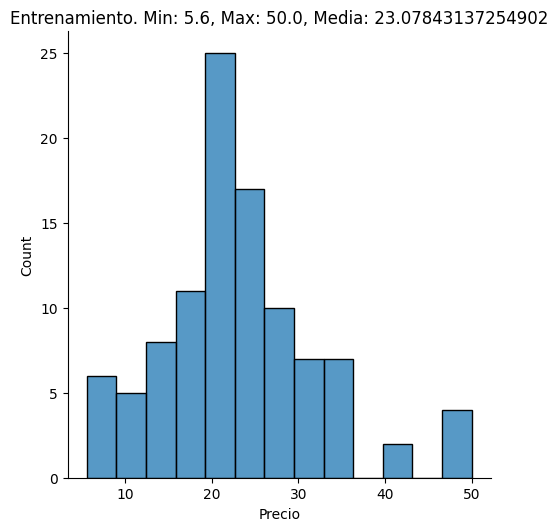

In [6]:
# Visualizamos la salida (precio) en cada uno de los grupos para hacernos una idea de las distribuciones
sns.displot(y_train)
plt.xlabel('Precio')
plt.title(f'Entrenamiento. Min: {y_train.min()}, Max: {y_train.max()}, Media: {y_train.mean()}')

sns.displot(y_val)
plt.xlabel('Precio')
plt.title(f'Entrenamiento. Min: {y_val.min()}, Max: {y_val.max()}, Media: {y_val.mean()}')

sns.displot(y_test)
plt.xlabel('Precio')
plt.title(f'Entrenamiento. Min: {y_test.min()}, Max: {y_test.max()}, Media: {y_test.mean()}')

En los tres subconjuntos las distribuciones de la variables salida (precio) son similares. Todas tienen valores similares mínimos, máximos y medios.

A continuación vamos a analizar las características de entrada. En primer lugar vamos a analizar los rangos en los que éstas se encuentran. Estas se comportan mejor cuando tratamos con variables con valores en la misma escala.

In [7]:
# Vamos el rango de las variables
print('Valores mínimos variables: ', X_train.min(axis=0))
print('Valores máximos variables: ', X_train.max(axis=0))


Valores mínimos variables:  [9.0600e-03 0.0000e+00 4.6000e-01 0.0000e+00 3.8500e-01 3.5610e+00
 2.9000e+00 1.1296e+00 1.0000e+00 1.8800e+02 1.2600e+01 3.2000e-01
 1.7300e+00]
Valores máximos variables:  [ 88.9762 100.      27.74     1.       0.871    8.725  100.      10.7103
  24.     711.      22.     396.9     37.97  ]


Vemos que están en escalas diferentes, para evitar el mayor efecto de unas variables frente a otras vamos a normalizar todas las variables siguiendo una estrategía z-score

In [8]:
# La normalización se realiza empleando el valor medio y desviación estándar del conjunto de datos de entrenamiento.
# Estos mismos valores son los que se emplearán para normalizar los conjuntos de datos de validación y test.

# Normalización de los datos
train_mean_x = X_train.mean()
train_std_x = X_train.std()

X_train_norm = (X_train - train_mean_x) / train_std_x
X_val_norm = (X_val - train_mean_x) / train_std_x
X_test_norm = (X_test - train_mean_x) / train_std_x

# Vamos el rango de las variables normalizadas
print('Valores mínimos variables normalizadas: ', X_train_norm.min(axis=0))
print('Valores máximos variables normalizadas: ', X_train_norm.max(axis=0))

Valores mínimos variables normalizadas:  [-0.48334316 -0.48340601 -0.48021511 -0.48340601 -0.48073536 -0.45870425
 -0.46328944 -0.47557026 -0.47646926  0.82070241 -0.396003   -0.48118625
 -0.47140544]
Valores máximos variables normalizadas:  [ 0.13379937  0.21026868 -0.29098065 -0.47646926 -0.4773641  -0.42288289
  0.21026868 -0.40911137 -0.31692408  4.44862105 -0.33079758  2.26978884
 -0.22001773]


In [9]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

Ya podemos ver como, tras realizar la normalización, las variables se encuentran en escalas similares.

In [10]:
features = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"]

df = pd.DataFrame(X_train, columns=features)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90
1,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5.0,403.0,14.7,88.63,16.14
2,0.11027,25.0,5.13,0.0,0.453,6.456,67.8,7.2255,8.0,284.0,19.7,396.90,6.73
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.19073,22.0,5.86,0.0,0.431,6.718,17.5,7.8265,7.0,330.0,19.1,393.74,6.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0.08308,0.0,2.46,0.0,0.488,5.604,89.8,2.9879,3.0,193.0,17.8,391.00,13.98
319,0.05360,21.0,5.64,0.0,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28
320,0.13117,0.0,8.56,0.0,0.520,6.127,85.2,2.1224,5.0,384.0,20.9,387.69,14.09
321,41.52920,0.0,18.10,0.0,0.693,5.531,85.4,1.6074,24.0,666.0,20.2,329.46,27.38


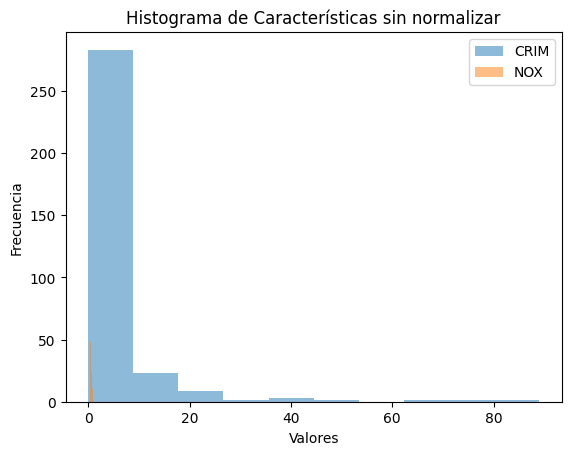

In [11]:
# Histograma para la primera columna
plt.hist(X_train[:, 0], alpha=0.5, label='CRIM')

# Histograma para la quinta columna
plt.hist(X_train[:, 4], alpha=0.5, label='NOX')

# Agregar etiquetas al eje x e y
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregar una leyenda
plt.legend()

# Agregar un título al gráfico
plt.title('Histograma de Características sin normalizar')

# Mostrar el gráfico
plt.show()


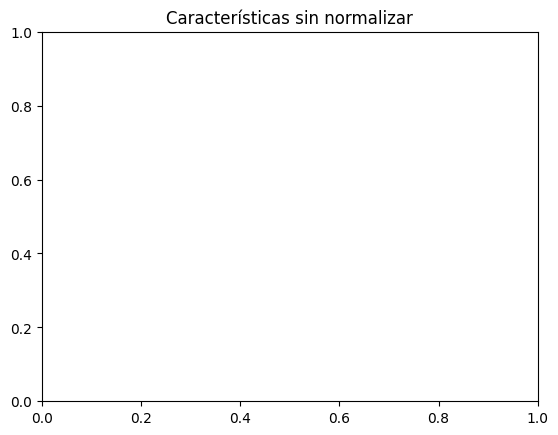

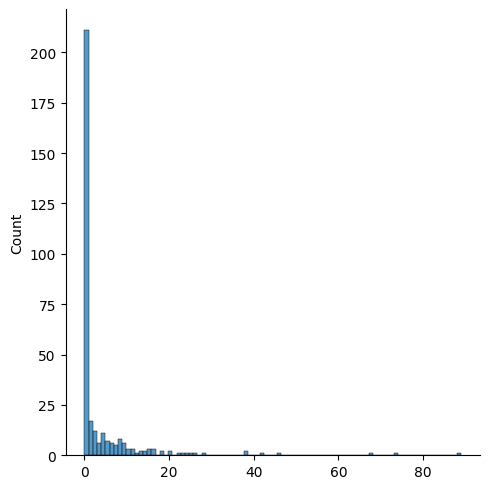

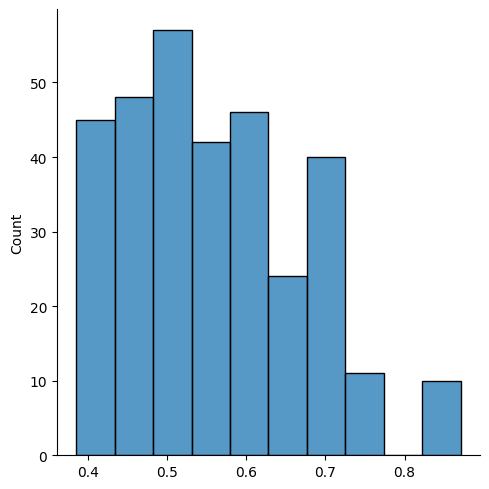

In [12]:
plt.title('Características sin normalizar')
sns.displot(X_train[:, 0])
sns.displot(X_train[:, 4])
plt.show()

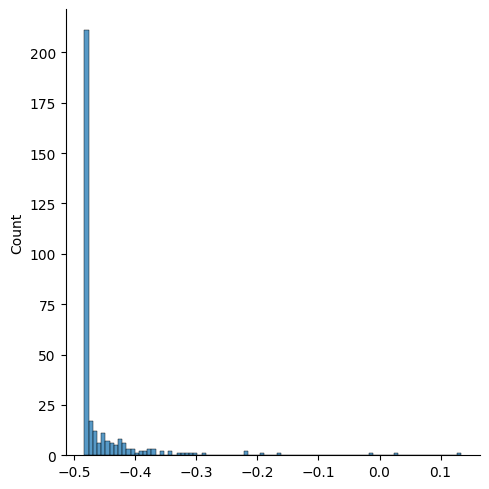

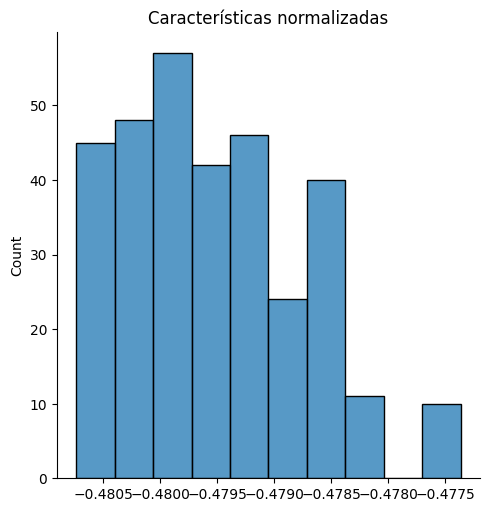

In [13]:
sns.displot(X_train_norm[:, 0])
sns.displot(X_train_norm[:, 4])
plt.title('Características normalizadas')
plt.show()

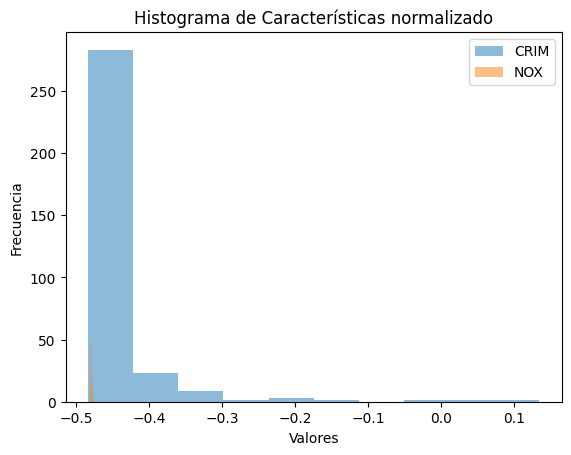

In [14]:
# Histograma para la primera columna
plt.hist(X_train_norm[:, 0], alpha=0.5, label='CRIM')

# Histograma para la quinta columna
plt.hist(X_train_norm[:, 4], alpha=0.5, label='NOX')

# Agregar etiquetas al eje x e y
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Agregar una leyenda
plt.legend()

# Agregar un título al gráfico
plt.title('Histograma de Características normalizado')

# Mostrar el gráfico
plt.show()


**NOTA**: En el paso de preparación de los datos, se deberán de llevar a cabo todas las tareas que ya habréis visto en la parte de Machine Learning de Análisis Exploratorio de los Datos (EDA), como puede ser: tratamiento de datos faltante, valores atípicos, correlaciones, etc.

**Paso 2: Construcción del modelo**

Para construir el modelo primero debemos definir la arquitectura deseada, es decir, el conjunto de capas que forma la red neuronal.
Una vez definida la arquitectura se debe especificar la función de coste a emplear, el optimizador para la actualización de los pesos y las métricas para monitorizar el proceso de entrenamiento. Para esto emplearemos el método "compile()" que hace uso de los parámetros:



*   *optimizer*: Optimizador que define cómo se actualizan los pesos.
*   *loss*: Función de coste a optimizar durante el entrenamiento.
*   *metrics*: Métricas que se computan al final de cada iteración para monitorizar el proeso de entrenamiento. Se computan tanto sobre el conjunto de entrenamiento como, en su caso, el de validación.

En primer lugar vamos a construir una arquitectura sencilla formada por la capa de entrada, una capa oculta con 20 nueronas y la capa de salida. Como función de coste emplearemos el error cuadrático medio.


Evaluación de un problema de regresión

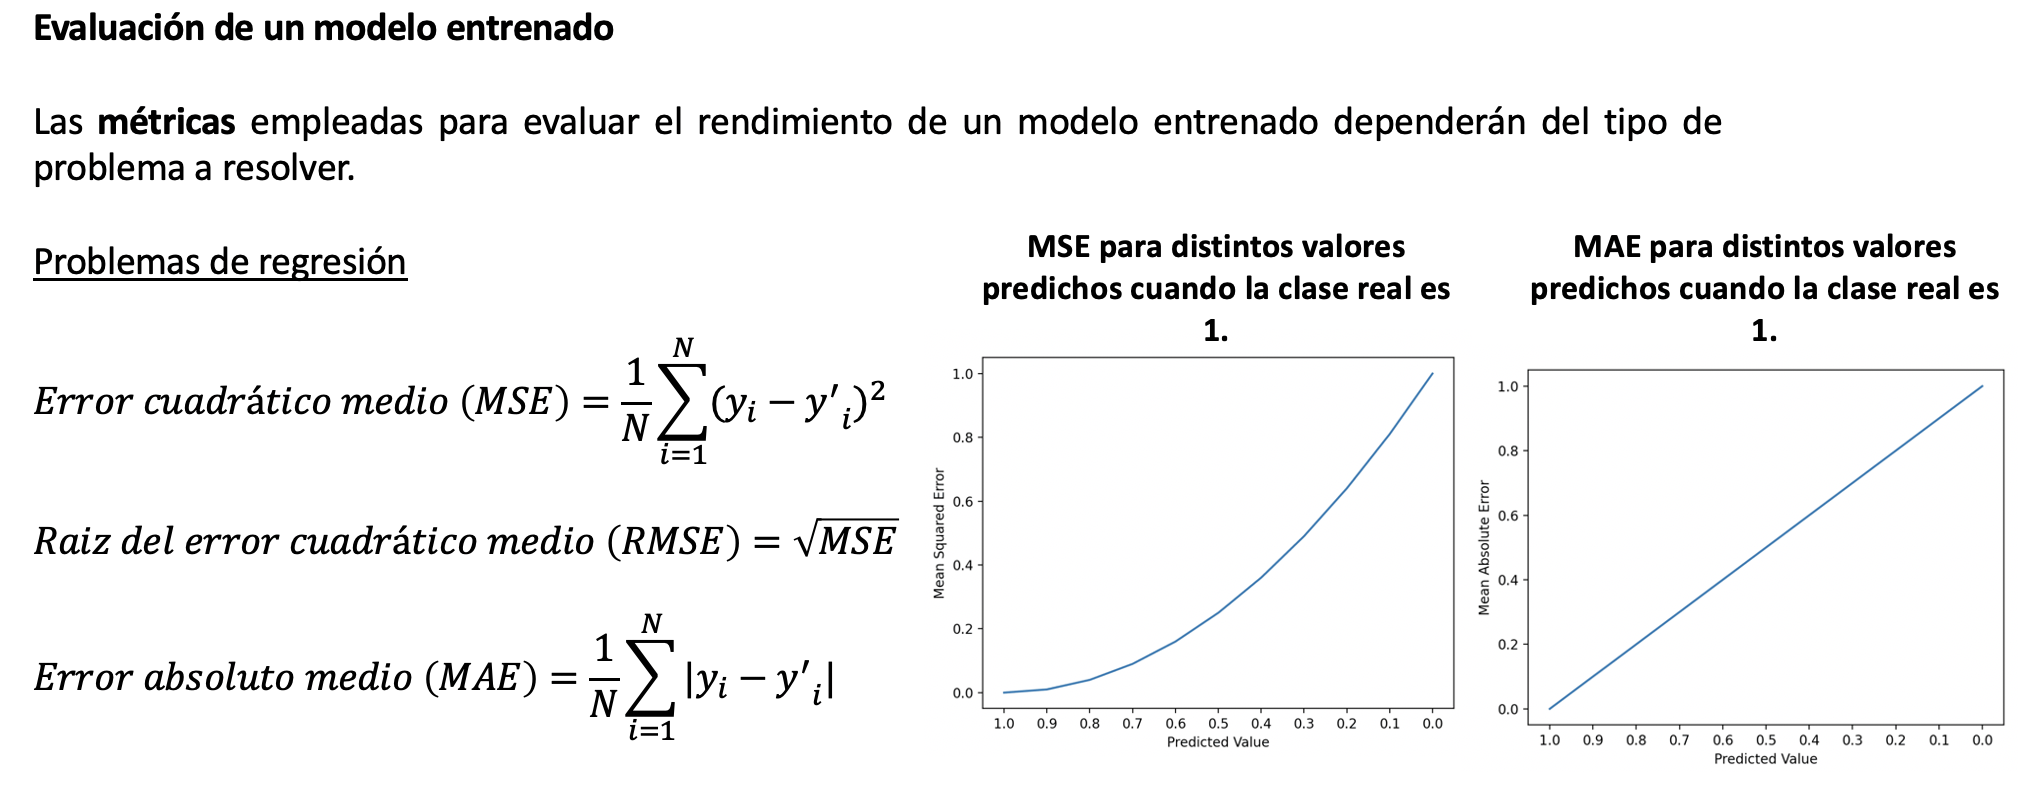

In [15]:
# Creamos un método que define la arquitectura del modelo
def create_model_regression(n_features):
    model = keras.Sequential()
    # model.add(Dense(20, activation = 'relu'))
    model.add(Dense(20, activation = 'relu', input_shape=(n_features,)))
    model.add(Dense(1))
    return model

#OJO!! En regresión una única neurona en la última capa

In [16]:
# Definimos la arquitectura del modelo
model_regression = create_model_regression(X_train.shape[1])

# Compilamos
# model.compile(
#     loss = tf.keras.losses.mean_squared_error,
#     optimizer = tf.keras
# )
model_regression.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
model_regression.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Paso 3: Entrenamiento del modelo**

Una vez definido el modelo hay que entrenarlo, para ello se hade uso del método "fit()" y definiremos el conjunto de datos de entrenamiento, validación, el número de épocas y el tamaño de batch.

In [17]:
history_reg = model_regression.fit(X_train_norm, y_train,epochs = 1000, validation_data = (X_val_norm, y_val))

Epoch 1/1000


11/11 [==============================] - 1s 19ms/step - loss: 616.1804 - mse: 616.1804 - mae: 23.0064 - val_loss: 549.1998 - val_mse: 549.1998 - val_mae: 22.0525
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 594.8743 - mse: 594.8743 - mae: 22.5377 - val_loss: 527.9875 - val_mse: 527.9875 - val_mae: 21.5683
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 573.5151 - mse: 573.5151 - mae: 22.0600 - val_loss: 507.5894 - val_mse: 507.5894 - val_mae: 21.0928
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 552.1492 - mse: 552.1492 - mae: 21.5793 - val_loss: 486.7903 - val_mse: 486.7903 - val_mae: 20.5972
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 530.7271 - mse: 530.7271 - mae: 21.0754 - val_loss: 465.6054 - val_mse: 465.6054 - val_mae: 20.0755
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 508.7587 - mse: 508.7587 - mae: 20.5538 - val_loss: 4

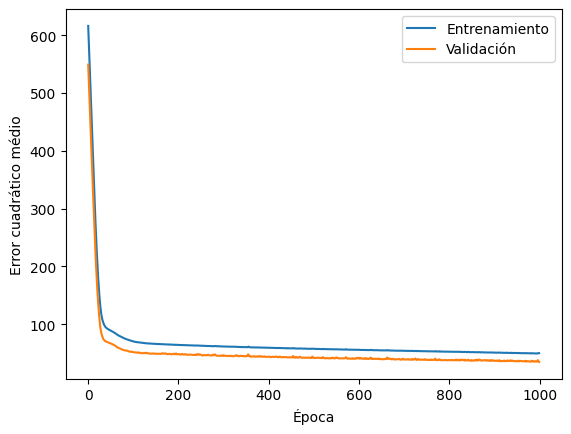

In [18]:
# Visualizamos el error cuadrático medio obtenido durante el proceso de entrenamiento tanto en entrenamiento como en validación
def plot_history():
    plt.plot(history_reg.history['mse'], label="Entrenamiento")
    plt.plot(history_reg.history['val_mse'], label="Validación")
    plt.ylabel('Error cuadrático médio')
    plt.xlabel('Época')
    plt.legend(loc="upper right")

plot_history()

In [19]:
history_reg.history

{'loss': [616.180419921875,
  594.8743286132812,
  573.5150756835938,
  552.1492309570312,
  530.72705078125,
  508.7586975097656,
  487.3039245605469,
  466.2328186035156,
  444.3668212890625,
  423.4185485839844,
  402.18634033203125,
  381.7254943847656,
  360.5174865722656,
  339.2731018066406,
  318.7598571777344,
  298.3710021972656,
  278.58856201171875,
  260.04144287109375,
  242.1957244873047,
  225.5757293701172,
  210.20387268066406,
  195.19161987304688,
  181.1896514892578,
  169.4175262451172,
  157.8264923095703,
  147.2600860595703,
  138.04835510253906,
  129.8707733154297,
  122.78412628173828,
  117.4151611328125,
  112.80175018310547,
  109.22956085205078,
  106.36065673828125,
  103.65494537353516,
  101.558837890625,
  99.5293197631836,
  98.03179168701172,
  96.74825286865234,
  95.40939331054688,
  94.49820709228516,
  93.82866668701172,
  93.1878662109375,
  92.60054016113281,
  92.04862976074219,
  91.52711486816406,
  91.0742416381836,
  90.6537094116211,
  

De la gráfica anterior podemos ver que no se ha producido sobreajuste en el entrenamiento. Representado por la similitud en los valores entre lo obtenido en el conjunto de datos de entrenamiento y el de validación.

**Paso 4: Evaluación del modelo**

Finalmente, hay que evaluar el modelo sobre un nuevo conjunto de datos (datos de test) para comprobar la robustez y capacidad de generalización (reproducibilidad) del modelo que hemos desarrollado. Para ello haremos uso del método "evaluate()", este, dada la entrada y salida esperada extrae las métricas.

Si lo que queremos es únicamente hacer inferencia sobre un nuevo registro emplearemos el método "predict()"

In [20]:
# Finalmente, evaluamos como se comporta el modelo en el conjunto de datos de test
loss, mae, mse = model_regression.evaluate(X_test_norm, y_test)
rmse = np.sqrt(mse)
print('Error cuadrático medio en test: ', mse)
print('Raiz del error cuadrático medio en test: ', rmse)

4/4 [==============================] - 0s 2ms/step - loss: 47.7293 - mse: 47.7293 - mae: 4.9080
Error cuadrático medio en test:  4.907956123352051
Raiz del error cuadrático medio en test:  2.2153907383014966
